Reading an Image
[https://towardsdatascience.com/visualising-the-rgb-channels-of-satellite-images-with-python-6d541af1f98d]
For reading an image, use the imread() function in OpenCV [https://learnopencv.com/read-display-and-write-an-image-using-opencv/]. Here’s the syntax:

imread(filename, flags)

It takes two arguments:

    The first argument is the image name, which requires a fully qualified pathname to the file.
    The second argument is an optional flag that lets you specify how the image should be represented. OpenCV offers several options for this flag, but those that are most common include:

    cv2.IMREAD_UNCHANGED  or -1
    cv2.IMREAD_GRAYSCALE  or 0
    cv2.IMREAD_COLOR  or 1

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Python program to compute and visualize the
# histogram of Blue channel of image

# importing libraries
import sys, time, os, datetime, glob
import cv2
import argparse
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from platform import python_version

print(f"(Sys version) :|: {sys.version} :|:")
os.system("which python")
print(f"(Python version) :#: {python_version()} :#:")

(Sys version) :|: 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 05:35:01) [MSC v.1916 64 bit (AMD64)] :|:
(Python version) :#: 3.7.12 :#:


0 255
0 255
0 255
0 255


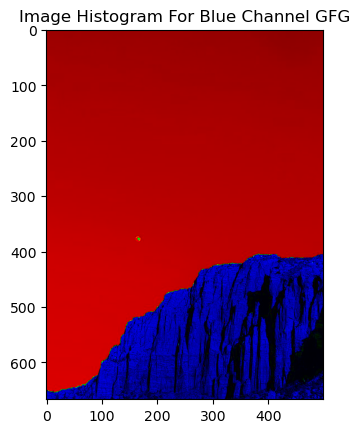

In [4]:
# reading the input image
img = cv2.imread('mountain.png')
#img = cv2.imread('dark_tones.jpg')

img_blue = img[:,:,2]
img_green = img[:,:,1]
img_red = img[:,:,0]

# split the image into its BGR components
(B, G, R) = cv2.split(img)
# find the maximum pixel intensity values for each
# (x, y)-coordinate,, then set all pixel values less
# than M to zero
M = np.maximum(np.maximum(R, G), B)

print(B.min(),B.max())
print(G.min(),G.max())
print(R.min(),R.max())

print(M.min(),M.max())


R[R < M] = 0
G[G < M] = 0
B[B < M] = 0

# print(R)
# print(G)
# print(B)
# merge the channels back together and return the image
mergeimg=cv2.merge([B, G, R])

# print(max(img_blue))
# print(min(img_blue))
# print(max(img_green))
# print(min(img_green))
# print(max(img_red))
# print(min(img_red))

# plot the above computed histogram
plt.imshow(mergeimg)
plt.title('Image Histogram For Blue Channel GFG')
plt.show()

0.0 8566.0


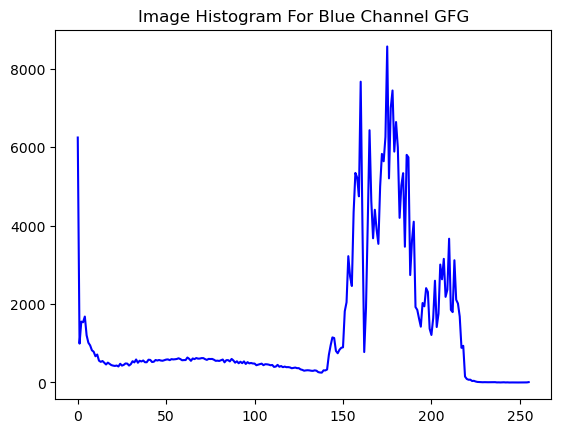

In [5]:
# computing the histogram of the blue channel of the image
hist = cv2.calcHist([img],[0],None,[256],[0,256])

print(hist.min(),hist.max())

# np.savetxt(time.strftime("%Y%m%d_%H%M%S")+"_Blue.csv", np.vstack((hist)).T, delimiter=', ')
# np.savetxt(time.strftime("%Y%m%d_%H%M%S")+"_Blue.csv", np.vstack((hist)), delimiter=', ')
np.savetxt("mountain_Blue.csv", np.vstack((hist)), delimiter=', ')

# plot the above computed histogram
plt.plot(hist, color='b')
plt.title('Image Histogram For Blue Channel GFG')
plt.show()

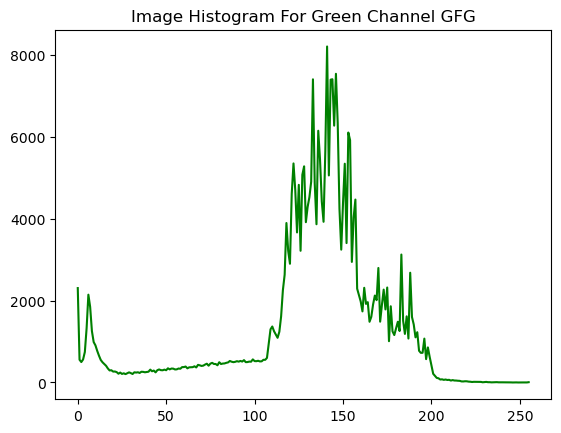

In [6]:
# reading the input image
img = cv2.imread('mountain.png')
#img = cv2.imread('dark_tones.jpg')

# computing the histogram of the green channel of the image
hist = cv2.calcHist([img],[1],None,[256],[0,256])

# plot the above computed histogram
plt.plot(hist, color='g')
plt.title('Image Histogram For Green Channel GFG')
plt.show()

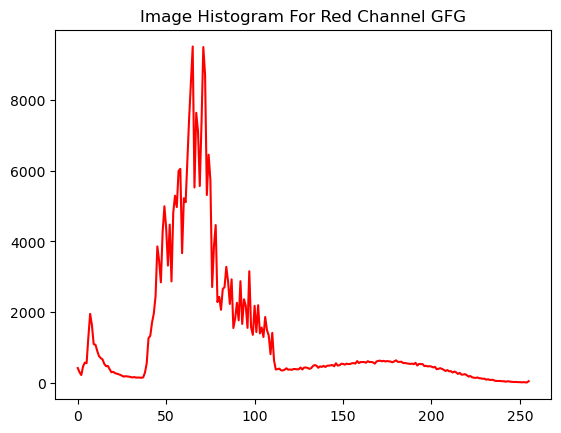

In [7]:
# reading the input image
img = cv2.imread('mountain.png')
#img = cv2.imread('dark_tones.jpg')

# computing the histogram of the Red channel of the image
hist = cv2.calcHist([img],[2],None,[256],[0,256])

# plot the above computed histogram
plt.plot(hist, color='r')
plt.title('Image Histogram For Red Channel GFG')
plt.show()

Calculating the histogram of an image is very useful as it gives an intuition regarding some properties of the image such as the tonal range, the contrast and the brightness.

→ To identify the dominant colors in an image, we can use the histogram plot of the Hue channel [BIT DEPTH].

    In an image histogram, the x-axis represents the different color values, which lie between 0 and 255, and the y-axis represents the number of times a particular intensity value occurs in the image, 8 bits image [https://shotkit.com/8-bit-vs-16-bit/].
    If you are shooting in JPEG you’re limiting your bit depth to 8-bit "BIT DEPTH", which gives you 256 levels of color and tone to play with. RAW images can be anywhere from 12 to 16 bit, with the latter giving you 65,536 levels of color and tone, meaning that you have a lot more latitude for change [https://petapixel.com/2017/09/06/8-bit-vs-16-bit-photos-heres-difference/] [https://web.stanford.edu/class/cs101/image-1-introduction.html] [https://www.slrlounge.com/8-bit-vs-16-bit-images-a-visual-demonstration/] [https://www.youtube.com/watch?v=cbZ-gjeYtZo] [https://rgb.to/rgb/0,0,255].

Calculating the Histogram

OpenCV provides the function cv2.calcHist to calculate the histogram of an image. The signature is the following:

cv2.calcHist(images, channels, mask, bins, ranges)

where:
1. images - is the image we want to calculate the histogram of wrapped as a list, so if our image is in variable image we will pass [image],
2. channels - is the the index of the channels to consider wrapped as a list ([0] for gray-scale images as there's only one channel and [0], [1] or [2] for color images if we want to consider the channel green, blue or red respectively),
3. mask - is a mask to be applied on the image if we want to consider only a specific region (we're gonna ignore this in this post),
4. bins - is a list containing the number of bins to use for each channel,
5. ranges - is the range of the possible pixel values which is [0, 256] in case of RGB color space (where 256 is not inclusive).

The returned value hist is a numpy.ndarray with shape (n_bins, 1) where hist[i][0] is the number of pixels having an intensity value in the range of the i-th bin.

We can simplify this interface by wrapping it with a function that in addition to calculate the histogram it also draws it (at the moment we’re going to fix the number of bins to 256):

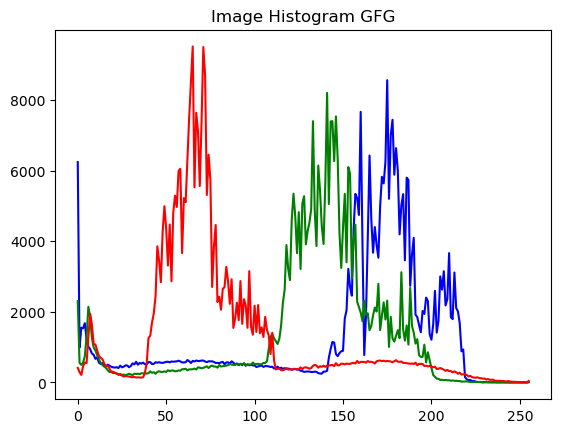

<class 'numpy.ndarray'>
(667, 500, 3)
<class 'tuple'>
width:   500
height:  667
channel: 3
width:  500
height: 667
width:  500
height: 667
(500, 667)
256
1


In [8]:
# reading the input image
img = cv2.imread('mountain.png')
#img = cv2.imread('dark_tones.jpg')

# define colors to plot the histograms
colors = ('b','g','r')

# compute and plot the image histograms
for i,color in enumerate(colors):
	hist = cv2.calcHist([img],[i],None,[256],[0,256]) # bit depth to 8-bit "BIT DEPTH"
	plt.plot(hist,color = color) # bit depth to 8-bit "BIT DEPTH"
plt.title('Image Histogram GFG')
plt.show()

print(type(img))
print(img.shape)
print(type(img.shape))

h, w, c = img.shape
print('width:  ', w)
print('height: ', h)
print('channel:', c)

h, w, _ = img.shape
print('width: ', w)
print('height:', h)

print('width: ', img.shape[1])
print('height:', img.shape[0])

print(img.shape[1::-1])

print(len(hist))
print(len(color))

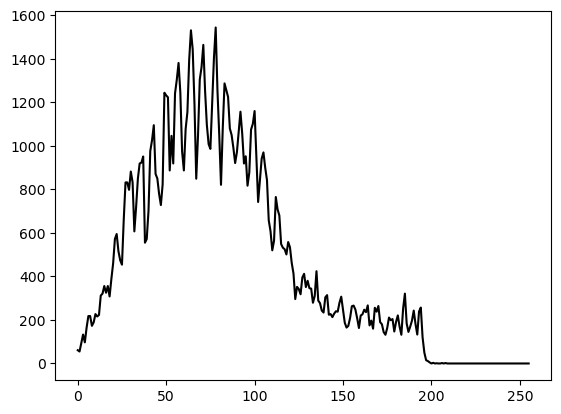

In [9]:
image = cv2.imread('dark_tones.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.plot(histogram, color='k')
plt.show()

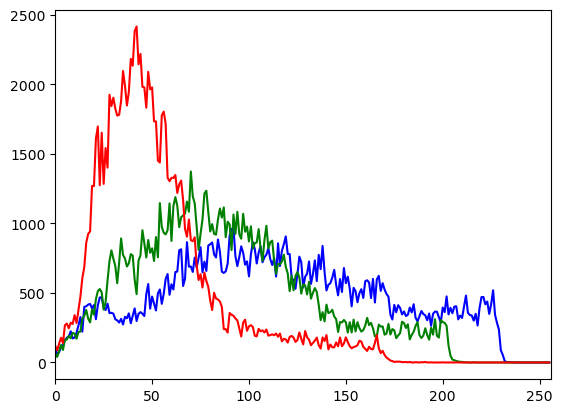

In [10]:
image = cv2.imread('dark_tones.jpg')

for i, col in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color = col)
    plt.xlim([0, 256])
    
plt.show()

In [11]:
w=cv2.imread('mountain.png',1)
cv2.imshow('image',w)
b,g,r = cv2.split(w)
height = np.size(w, 0)
width = np.size(w, 1)
bw = np.zeros((height,width))
  
# for i in range(1,height):
#     for j in range(1,width):
#         if(b[i,j]<g[i,j] and r[i,j]<g[i,j] and g[i,j]>125):
#             bw[i,j]=1
# cv2.imshow('Black and White image',bw)
# kernel = np.ones((5,5),np.uint8)
# bw= cv2.erode(bw,kernel,iterations = 4)
# cv2.imshow('Eroded image',bw)
# bw = cv2.dilate(bw,kernel,iterations = 3)
# cv2.imshow('Final Image',bw)
# cv2.waitKey(0)
# cv2.destroyAllWindows()